In [1]:
%matplotlib notebook

#import ipywidgets as widgets
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
thtsize, phisize = 11, 6
Tht, Phi = np.mgrid[:thtsize,:phisize]
Density = np.ones((thtsize, phisize)) + 0.1*Phi + 0.1*Tht
#Density = Density / Density.sum(axis=0)

In [3]:
# takes a thtsize x phisize input raw density function
# it then converts it to an inverse cdf along the tht-axis
# (so changes in other phi coords dont affect the output at the orig. phi coord)
# pdf(tht) = const -> invcdf(x) = x
def convert_rawpdf_to_invcdf(pdf, invcdf_resolution):
    pdf = pdf / pdf.sum(axis=0)
    thtsize, phisize = pdf.shape
    invcdf_x1d = np.linspace(0, 1, invcdf_resolution)
    cdf_x1d = np.linspace(0, 1, thtsize+1)
    cdf_y = np.cumsum(np.insert(pdf, 0, np.zeros(phisize), axis=0), axis=0)
    inv_cdf = np.empty((invcdf_resolution, phisize))
    for i, cdf_y1d in enumerate(cdf_y.T):
        inv_cdf[:,i] = np.interp(invcdf_x1d, cdf_y1d, cdf_x1d)
    return inv_cdf

In [4]:
pdf = np.array([[1,1,1,1],
                [1,2,3,10000],
                [1,1,1,1]])

In [5]:
inv_cdf = convert_rawpdf_to_invcdf(pdf, 4)

<IPython.core.display.Javascript object>


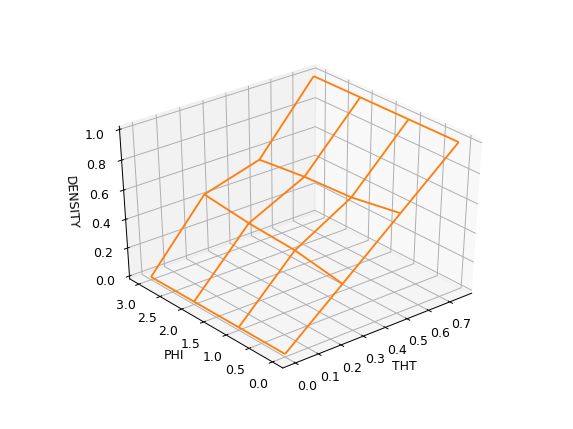

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("THT"); ax.set_ylabel("PHI"); ax.set_zlabel("DENSITY")

thtsize, phisize = inv_cdf.shape
cTht, cPhi = np.mgrid[:thtsize, :phisize]
cTht = cTht / (thtsize)
ax.plot_wireframe(cTht, cPhi, inv_cdf, color="C1")

In [74]:
size = 100*2+1, 37
scales_mus_covs = [
    # strength, pol, tor
    [ 1.8 , [ 0.45 , 0 ], [[10,0],[0, 7]]],
    [ 1.8 , [ 0.45 , 1 ], [[10,0],[0, 7]]],
    [ -1.8 , [ 0.55 , 0 ], [[10,0],[0, 7]]],
]

In [75]:
from combine.quick_g import multi_bump
pdf = multi_bump(size, scales_mus_covs)
pdf = pdf[:, :]
pdf = np.maximum(pdf, 0.0)

In [76]:
inv_cdf = convert_rawpdf_to_invcdf(pdf, 100*2+1)

<IPython.core.display.Javascript object>


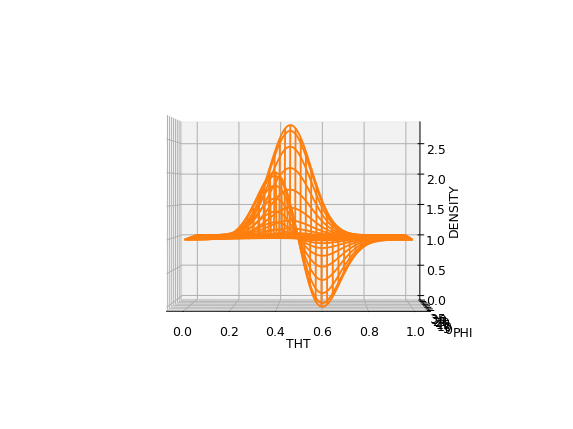

In [77]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("THT"); ax.set_ylabel("PHI"); ax.set_zlabel("DENSITY")

thtsize, phisize = pdf.shape
cTht, cPhi = np.mgrid[:thtsize, :phisize]
cTht = cTht / (thtsize)
ax.plot_wireframe(cTht, cPhi, pdf, color="C1")

<IPython.core.display.Javascript object>


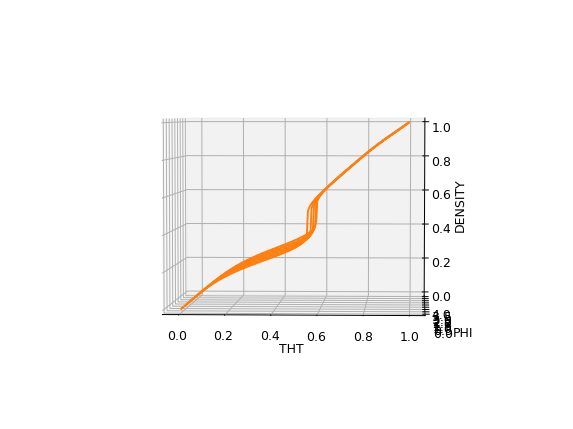

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("THT"); ax.set_ylabel("PHI"); ax.set_zlabel("DENSITY")

thtsize, phisize = inv_cdf.shape
cTht, cPhi = np.mgrid[:thtsize, :phisize]
cTht = cTht / (thtsize)
ax.plot_wireframe(cTht, cPhi, inv_cdf, color="C1")

In [49]:
pdf = pdf / pdf.sum(axis=0)
invcdf_resolution = 100*2+1

In [50]:
thtsize, phisize = pdf.shape
invcdf_x1d = np.linspace(0, 1, invcdf_resolution)

In [52]:
cdf_x1d = np.linspace(0, 1, thtsize+1)

In [53]:
cdf_y = np.cumsum(np.insert(pdf, 0, np.zeros(phisize), axis=0), axis=0)

In [54]:
cdf_y.shape

(202, 5)

<IPython.core.display.Javascript object>


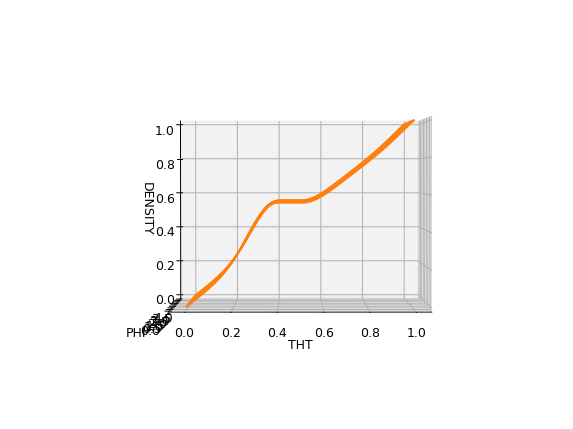

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("THT"); ax.set_ylabel("PHI"); ax.set_zlabel("DENSITY")

thtsize, phisize = cdf_y.shape
cTht, cPhi = np.mgrid[:thtsize, :phisize]
cTht = cTht / (thtsize)
ax.plot_wireframe(cTht, cPhi, cdf_y, color="C1")

In [ ]:

    
    
    
    inv_cdf = np.empty((invcdf_resolution, phisize))
    for i, cdf_y1d in enumerate(cdf_y.T):
        inv_cdf[:,i] = np.interp(invcdf_x1d, cdf_y1d, cdf_x1d)